In [1]:
%load_ext rpy2.ipython

In [4]:
%%R
# loading R packages
library(dplyr)
library(ggplot2)
library(tidyr)
library(phyloseq)

In [5]:
%%R
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", treefilename = "../data/ssu-aln.bacteria.mask.tre",
                    parseFunction = parse_taxonomy_greengenes)

In [6]:
%%R
l2fc<-read.csv("../data/l2fc.csv")

In [8]:
%%R
head(l2fc)

  Day Amdmt     OTU   baseMean        l2FC         SE    pvalue      padj
1   1     1  OTU.43  223.48048 -0.11012779 0.29052924 0.7046439 0.8990732
2   1     1   OTU.2 1664.01427  0.11095267 0.07837381 0.1568676 0.4569113
3   1     1 OTU.187  362.13258  0.06605159 0.15991481 0.6795756 0.8866206
4   1     1 OTU.150   39.05672  0.03205671 0.15816953 0.8393906 0.9496064
5   1     1  OTU.91   62.21140 -0.01718316 0.37497442 0.9634498 0.9886185
6   1     1 OTU.305   37.70726 -0.14629517 0.27103038 0.5893528 0.8405491


In [9]:
%%R
l2fc %>%
    group_by(OTU, Amdmt, Day) %>%
    summarize(N = n()) %>%
    arrange(desc(N)) %>%
    group_by() %>%
    head

Source: local data frame [6 x 4]

     OTU Amdmt Day N
1  OTU.1     1   1 1
2  OTU.1     1   2 1
3  OTU.1     2   1 1
4  OTU.1     2   2 1
5 OTU.10     1   1 1
6 OTU.10     1   2 1


In [10]:
%%R
d.plot = l2fc %>%
    select(OTU, Amdmt, Day, l2FC) %>%
    spread(Amdmt, l2FC)

In [13]:
%%R
write.table(d.plot,"../data/l2fc.txt",sep="\t")

In [ ]:
%%R
head(merge((tax_table(physeq)),d.plot))

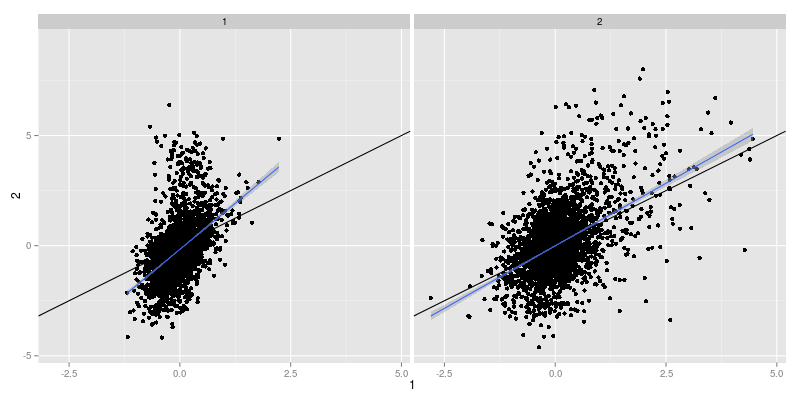

In [13]:
%%R -h 400 -w 800
p = ggplot(d.plot, aes(x = `1`, y =`2`, color=phylum))
p = p + geom_point()
p = p + geom_abline(slope = 1, intercept = 0)
p = p + stat_smooth(method = "lm")
p = p + facet_wrap(~Day)

p

In [ ]:
%%R
